In [1]:
import numpy as np
f=np.load("/home/amorelli/r_estimate/foreground_B/9_6_23/check_r_distribution.npz")
y_val=f["y_val"]
y_train=f["y_train"]

In [2]:
print(y_val.shape)
print(y_train.shape)
print(np.min(y_train))
print(y_train[:200])

(25300, 1)
(74688, 1)
0.0
[[0.0089354 ]
 [0.0089354 ]
 [0.0089354 ]
 [0.0089354 ]
 [0.0089354 ]
 [0.00894449]
 [0.00894449]
 [0.00894449]
 [0.00894449]
 [0.00894449]
 [0.00894449]
 [0.00894449]
 [0.00894449]
 [0.00894449]
 [0.00894449]
 [0.00894449]
 [0.00501365]
 [0.00501365]
 [0.00501365]
 [0.00501365]
 [0.00501365]
 [0.00501365]
 [0.00501365]
 [0.00501365]
 [0.00501365]
 [0.00501365]
 [0.00501365]
 [0.00501365]
 [0.00501365]
 [0.00501365]
 [0.00501365]
 [0.00501365]
 [0.00831665]
 [0.00831665]
 [0.00831665]
 [0.00831665]
 [0.00831665]
 [0.00831665]
 [0.00831665]
 [0.00831665]
 [0.00831665]
 [0.00831665]
 [0.00832575]
 [0.00832575]
 [0.00832575]
 [0.00832575]
 [0.00832575]
 [0.00832575]
 [0.00368517]
 [0.00368517]
 [0.00368517]
 [0.00368517]
 [0.00368517]
 [0.00368517]
 [0.00368517]
 [0.00368517]
 [0.00368517]
 [0.00368517]
 [0.00368517]
 [0.00368517]
 [0.00368517]
 [0.00368517]
 [0.00368517]
 [0.00368517]
 [0.0066242 ]
 [0.0066242 ]
 [0.0066242 ]
 [0.0066242 ]
 [0.0066242 ]
 [0.0066

In [9]:
print(y_val[:100])

[[0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [9.09918107e-06]
 [9.09918107e-06]
 [9.09918107e-06]
 [9.09918107e-06]
 [9.09918107e-06]
 [9.09918107e-06]
 [9.09918107e-06]
 [9.09918107e-06]
 [9.09918107e-06]
 [9.09918107e-06]
 [9.09918107e-06]
 [9.09918107e-06]
 [9.09918107e-06]
 [9.09918107e-06]
 [9.09918107e-06]
 [9.09918107e-06]
 [9.09918107e-06]
 [9.09918107e-06]
 [9.09918107e-06]
 [9.09918107e-06]
 [9.09918107e-06]
 [9.09918107e-06]
 [9.09918107e-06]
 [1.81983621e-05]
 [1.81983621e-05]
 [1.81983621e-05]
 [1.81983621e-05]
 [1.81983621e-05]
 [1.81983621e-05]
 [1.81983621e-05]
 [1.81983621e-05]
 [1.81983621e-05]
 [1.819836

In [4]:
import matplotlib.pyplot as plt
#print(y_val[:100])

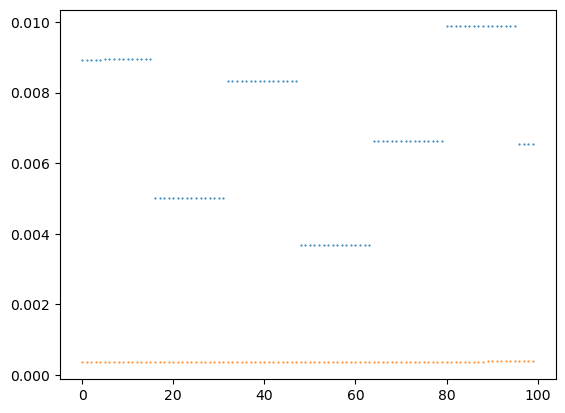

In [10]:
plt.plot(range(len(y_train[:100])),y_train[:100],linestyle='None',marker='.', markersize = 1.0)

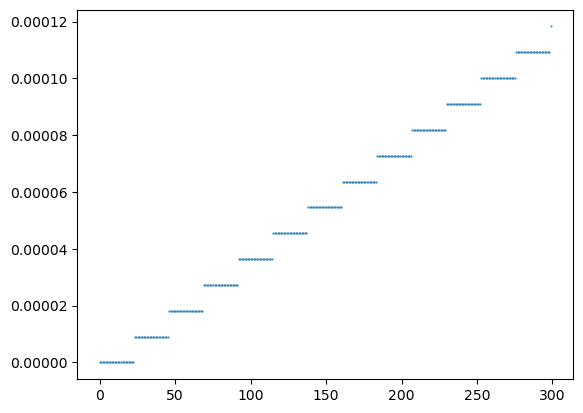

In [13]:
plt.plot(range(len(y_val[:300])),y_val[:300],linestyle='None',marker='.', markersize = 1.0)

In [4]:
def check_y(y_train):
    y_train=np.sort(y_train,axis=0)
    y_count=[]
    y_red=[]
    prev_index=0
    for i in range(1,len(y_train)):
        if y_train[i] != y_train[i-1]:
            y_count.append(i-prev_index)
            prev_index=i
            y_red.append(y_train[i-1])
        else:
            pass
    return y_count, y_red
y_count, y_red = check_y(y_train) 
y_count2, y_red2 = check_y(y_val)

In [6]:
print(y_red[0],y_red[1])
print(y_count[0],y_count[1])

[0.] [9.09918107e-06]
135 135


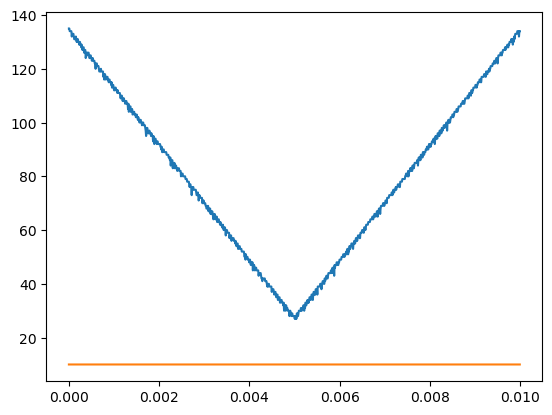

In [12]:
#print(y_red)
plt.plot(y_red,y_count)
plt.plot(y_red2,y_count2)

In [6]:
print(y_count[:10])
print(y_train[:400])

[135, 135, 134, 134, 134, 134, 134, 132, 133, 133]
[[0.00903549]
 [0.00903549]
 [0.00903549]
 [0.00903549]
 [0.00903549]
 [0.00903549]
 [0.00903549]
 [0.00903549]
 [0.00903549]
 [0.00903549]
 [0.00903549]
 [0.00903549]
 [0.00903549]
 [0.00903549]
 [0.00903549]
 [0.00903549]
 [0.00298453]
 [0.00298453]
 [0.00298453]
 [0.00298453]
 [0.00298453]
 [0.00298453]
 [0.00298453]
 [0.00298453]
 [0.00298453]
 [0.00298453]
 [0.00298453]
 [0.00298453]
 [0.00298453]
 [0.00298453]
 [0.00298453]
 [0.00298453]
 [0.00314832]
 [0.00314832]
 [0.00314832]
 [0.00315742]
 [0.00315742]
 [0.00315742]
 [0.00315742]
 [0.00315742]
 [0.00315742]
 [0.00315742]
 [0.00315742]
 [0.00315742]
 [0.00315742]
 [0.00315742]
 [0.00315742]
 [0.00315742]
 [0.00842584]
 [0.00842584]
 [0.00842584]
 [0.00842584]
 [0.00842584]
 [0.00842584]
 [0.00842584]
 [0.00842584]
 [0.00842584]
 [0.00842584]
 [0.00842584]
 [0.00842584]
 [0.00842584]
 [0.00842584]
 [0.00842584]
 [0.00842584]
 [0.00367607]
 [0.00367607]
 [0.00367607]
 [0.0036760

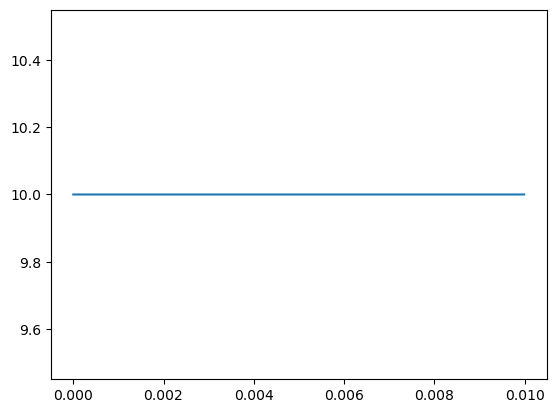

In [7]:
y_count_v=[]
y_red_v=[]
prev_index=0
for i in range(1,len(y_val)):
    if y_val[i] != y_val[i-1]:
        y_count_v.append(i-prev_index)
        prev_index=i
        y_red_v.append(y_val[i-1])
    else:
        pass
plt.plot(y_red_v,y_count_v)